In [10]:
#Codigo de analisi Tweet en español
#Autor: Santiago Subia

from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [32]:
tweets=pd.read_csv("C:/Users/Usuario/Desktop/CASO PRACTICO/CASO PRACTICO/TAREA 1.1/tweets.csv",encoding="latin-1")[0:3000]


In [33]:
tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   3000 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB


In [34]:
#FUNCION PARA LIMPIAR LOS TWEETS

def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #REMUEVEN @MENCIONES
 text = re.sub('#', '', text) # REMUEVEN '#' hash tag
 text = re.sub('RT[\s]+', '', text) # REMUEVEN RT
 text = re.sub('https?:\/\/\S+', '', text) # REMUEVEN hyperlink
 
 return text

In [35]:
# LIMPIAMOS LOS TWEETS

tweets['Tweet_depurados'] = tweets['Tweet'].apply(cleanTxt)

In [36]:
tweets

,Tweet,Tweet_depurados
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- Awww, that's a bummer. You shoulda got Da..."
1,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
...,...,...
2995,@ZoeAimee I'm trying to research some dude for...,I'm trying to research some dude for my engli...
2996,"just got up, pshhh going on the trampoline, ev...","just got up, pshhh going on the trampoline, ev..."
2997,Homework,Homework
2998,@pmarnandus re: daily gossip.. well the twitte...,re: daily gossip.. well the twitter gossips a...


In [37]:
# CREA UNA FUNCIÓN PARA getsubjetivity 


def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# CREA UNA FUNCIÓN PARA to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

# CREA dos nuevas columnas 'Subjectivity' & 'Polarity'
tweets['Subjectivity'] = tweets['Tweet'].apply(getSubjectivity)
tweets['Polarity'] =tweets['Tweet'].apply(getPolarity)



In [39]:
tweets


,Tweet,Tweet_depurados,Subjectivity,Polarity
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- Awww, that's a bummer. You shoulda got Da...",0.633333,0.216667
1,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,0.000000,0.000000
2,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...,0.500000,0.500000
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.400000,0.200000
4,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...",1.000000,-0.625000
...,...,...,...,...
2995,@ZoeAimee I'm trying to research some dude for...,I'm trying to research some dude for my engli...,0.187500,-0.062500
2996,"just got up, pshhh going on the trampoline, ev...","just got up, pshhh going on the trampoline, ev...",0.000000,0.000000
2997,Homework,Homework,0.000000,0.000000
2998,@pmarnandus re: daily gossip.. well the twitte...,re: daily gossip.. well the twitter gossips a...,0.250000,0.488281


In [40]:
#GRAFICAMOS DE ACUERDO A LAS PALABRAS MAS MENCIONADAS

allWords = ' '.join([twts for twts in tweets['Tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

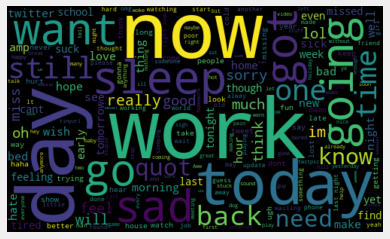

In [44]:
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show( )